In [1]:
#change this cell to change season and player name
season = '2005/2006'
ssn = '0506'
length = int(20)

In [2]:
import os
import json
from pandas.io.json import json_normalize
import codecs
import pandas as pd
import codecs
main_df = pd.DataFrame(data=None)
path_match = """C:\\Users\\koushik.r\\Documents\\open-data-master\\\\data\\events\\""" #location for play by play events
for root, dirs, files in os.walk(r'C:\Users\koushik.r\Documents\open-data-master\data\matches'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            with codecs.open(root + str('\\') + file,encoding='utf-8') as data_file:
                data = json.load(data_file)
                df = pd.DataFrame(data=None)
                df = json_normalize(data, sep = "_")
            #for x in df.competition_country_name:
            #    if x == 'Spain':
            #        print(df.match_id)
            for i in range(len(df)):
                if df.iloc[i]['competition_country_name'] == 'Spain'  and df.iloc[i]['season_season_name'] == season :
                    match_no = df.iloc[i]['match_id'] #gets match with Spain as country
                    match_no = str(match_no) # from int to str 
                    with codecs.open(path_match + match_no + str(r'.json'),encoding="utf8") as event_file: #open the respective file
                        df_match = json.load(event_file)
                        df_match2 = pd.DataFrame(data=None)
                        df_match2 = json_normalize(df_match,sep="_")    
             
                    main_df = main_df.append(df_match2,ignore_index=True,sort=False)                    
print('Done')

Done


In [3]:
Player = main_df.query('player_id == 5503  & type_id ==43 & play_pattern_id ==1 & duration >= 1.50')

In [4]:
player_name = Player.player_name.iloc[0]
#df[['a','b']]
Player = Player [['location','carry_end_location']]

In [5]:
from math import sqrt
distance= []
for i in range(len(Player)):
    distance.append(sqrt((Player.iloc[i]['carry_end_location'][0] - Player.iloc[i]['location'][0])**2 + ((Player.iloc[i]['carry_end_location'][1] - Player.iloc[i]['location'][1])**2)))
    #using distance formula above (sqrt((x2-x1)^2 + (y2-y1)^2))


In [6]:
Player['dribble_distance'] = distance

In [7]:
Player.head()

,location,carry_end_location,dribble_distance
2791,"[81.9, 77.4]","[85.6, 66.6]",11.416217
3160,"[78.7, 7.3]","[115.6, 22.8]",40.023243
3765,"[45.5, 4.5]","[48.2, 6.4]",3.301515
4811,"[43.1, 40.0]","[50.3, 28.4]",13.652839
5012,"[77.0, 65.6]","[97.8, 53.3]",24.164644


In [8]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [9]:

'''plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})'''

'plt.rcParams.update({\n    "lines.color": "white",\n    "patch.edgecolor": "white",\n    "text.color": "black",\n    "axes.facecolor": "white",\n    "axes.edgecolor": "lightgray",\n    "axes.labelcolor": "white",\n    "xtick.color": "white",\n    "ytick.color": "white",\n    "grid.color": "lightgray",\n    "figure.facecolor": "black",\n    "figure.edgecolor": "black",\n    "savefig.facecolor": "black",\n    "savefig.edgecolor": "black"})'

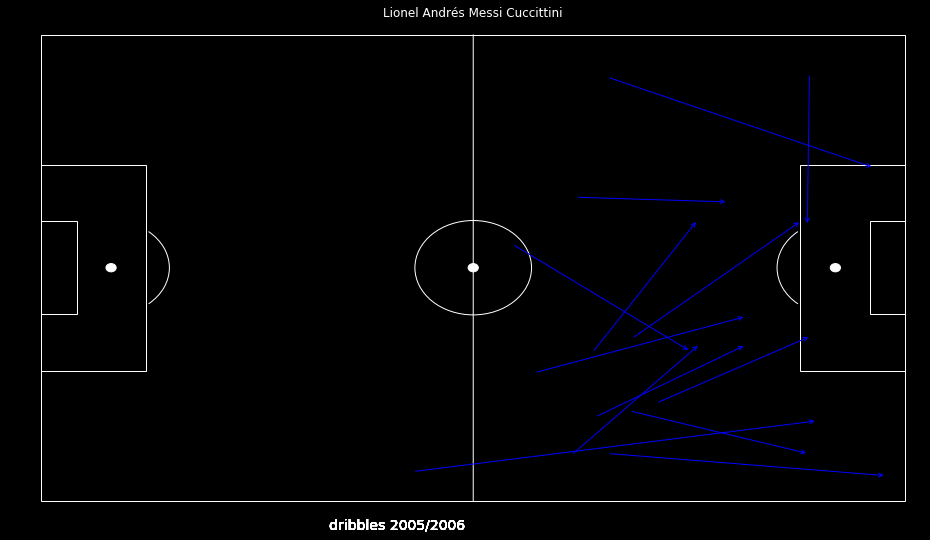

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
plt.style.use('dark_background')
fig=plt.figure() #set up the figures
fig.set_size_inches(16, 9)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
y_cary_end = 0
y_loc = 0
for i in range(len(Player)):
    # # y - y' = -2(y' +c) reflection 
    #mirror image of a point https://math.stackexchange.com/questions/1013230/how-to-find-coordinates-of-reflected-point
    y_cary_end = -2*(Player.iloc[i]['carry_end_location'][1] - 40) + Player.iloc[i]['carry_end_location'][1] 
    y_loc =  -2*(Player.iloc[i]['location'][1] - 40) + Player.iloc[i]['location'][1] 
    if Player.iloc[i]['carry_end_location'][0] >= 90 and Player.iloc[i]['dribble_distance'] >= length:
        ax.annotate("", xy = (Player.iloc[i]['carry_end_location'][0],y_cary_end), xycoords = 'data',
               xytext = (Player.iloc[i]['location'][0],y_loc ), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
        ax.set_title(player_name)
        ax.text(40, -5, 'dribbles '+ season, fontsize=14)
fname = 'C:\\Users\\koushik.r\\Desktop\\Messi data\\'+ player_name + str(' dribbles ')+ str(ssn)+'.png'
plt.savefig(fname,orientation='landscape')
plt.show()